In [54]:
import numpy.random as rand
import numpy as np
import matplotlib.pyplot as plt

In [55]:
def computCost(X, theta, y, lamda):
    J = 0
    J = np.sum( np.sum( ( np.matmul( X, np.transpose(theta) ) - y )**2 ) / 2)
    return J



In [56]:
print('visualization of Data...')
a = np.array([[5.,5.,0.,5.,5.],[0.,0.,0.,5.,5.],[5.,5.,0.,0.,0.],[5.,0.,5.,0.,5.],[0.,5.,5.,5.,0.]]) # Training data
print(a)

#Gen fitures
x = np.random.sample((4, 5))
theta = np.random.sample((4, 5))
x = np.vstack((np.ones((1, 5)), x))
theta = np.vstack((np.ones((1, 5)), theta))

x  = np.transpose(x)
theta = np.transpose(theta)

print('visualization of parameters x...')
print (x)
print('visualization of parameters theta...')
print (theta)

# useful parametrs
lamda = 0
alpfa = 0.01
step = 100
swaps = 10


visualization of Data...
[[5. 5. 0. 5. 5.]
 [0. 0. 0. 5. 5.]
 [5. 5. 0. 0. 0.]
 [5. 0. 5. 0. 5.]
 [0. 5. 5. 5. 0.]]
visualization of parameters x...
[[1.         0.17050488 0.56521225 0.06164255 0.5017186 ]
 [1.         0.85307661 0.18930648 0.28671786 0.96323877]
 [1.         0.28809784 0.64763846 0.60362697 0.25817474]
 [1.         0.18041112 0.29206268 0.23422159 0.42534431]
 [1.         0.40457758 0.8693144  0.62452198 0.22438751]]
visualization of parameters theta...
[[1.         0.58149063 0.33380206 0.79341    0.26820955]
 [1.         0.70137378 0.93204028 0.46816201 0.55225868]
 [1.         0.01013884 0.30860481 0.12476712 0.02641982]
 [1.         0.04826934 0.7906123  0.11221543 0.77296566]
 [1.         0.11574573 0.75654419 0.56814343 0.82830223]]


89.53095335764527
Predicting...
[[5. 5. 0. 5. 5.]
 [0. 0. 0. 5. 5.]
 [5. 5. 0. 0. 0.]
 [5. 0. 5. 0. 5.]
 [0. 5. 5. 5. 0.]]
accurancy...
100.0
plot cost history...


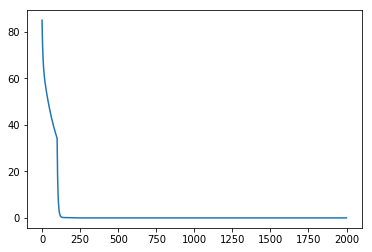

In [57]:
#initial val
initialCost = computCost(x, theta, a, lamda) 
print(initialCost)

history = np.zeros((1, 1000000))
i = 0;
# Start Colab. filtering
for k in range(0, swaps):
    for  v in range(0, step):
        Grad_x = np.matmul((np.matmul(x, np.transpose(theta)) - a), theta)
        x = x - alpfa * Grad_x
        history[0, i] = computCost(x, theta, a, lamda)
        i += 1
        #print(computCost(x, theta, a, lamda))
    for  v in range(0, step):
        Grad_theta = np.matmul(np.transpose((np.matmul(x, np.transpose(theta)) - a)), x)
        theta = theta - alpfa * Grad_theta
        history[0, i] = computCost(x, theta, a, lamda)
        i += 1
        #print(computCost(x, theta, a, lamda))
        


#predict
print("Predicting...")
Pred = np.matmul(x, np.transpose(theta))
Pred = np.abs(np.round(Pred, 1))

print(Pred)
#accurancy
print('accurancy...')
print(np.average(np.array_equal(Pred, a)) * 100)

#checking
print("plot cost history...")
plt.plot(range(0, i), history[0, range(0, i)])